In [128]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
# Define the folder path

# Create a dictionary to store the dataframes
dataframes = {}

# Define the different Re values
re_values = [800, 900, 1000, 1100,  1200,  1300, 1400, 1500, 1600,1700,1800,1900,2000, 2100,2200,2300, 2400,3000,3500,3800]


# Loop through each Re value and read the CSV files
for re_value in re_values:  # Avoid using 're' as a variable name
    folder_path = f"/Users/baochikhuc/Documents/microfiltration_model_2024/Model/Data Global Model Re = {re_value}"
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv') and f.startswith('dynamic_simulation')]
    
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df_name = os.path.splitext(file)[0]  # Use the file name without extension as the key
        dataframes[df_name] = pd.read_csv(file_path)
# Display the keys of the dataframes dictionary to see the imported dataframes


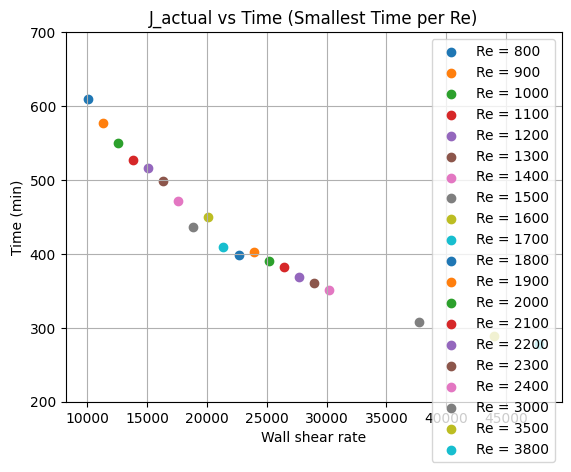

In [129]:
import re
import matplotlib.pyplot as plt

# Group the data by Re value
grouped_data = {}
for df_name, df in dataframes.items():
    match = re.search(r"Re(\d+)", str(df_name))
    if match:
        Re_value = int(match.group(1))
        if Re_value not in grouped_data:
            grouped_data[Re_value] = []
        J_actual_match = re.search(r"J_actual_(\d+\.\d+)", df_name)
        if J_actual_match:
            J_actual_value = float(J_actual_match.group(1))
            last_row = df.iloc[-1]
            grouped_data[Re_value].append((last_row['Time (s)'], J_actual_value, Re_value))

# Filter the grouped data to select the data with the smallest time for each Re value
filtered_data = {}
for Re_value, data in grouped_data.items():
    # Find the entry with the smallest time duration
    smallest_time_entry = min(data, key=lambda x: x[0])  # x[0] is the time value
    filtered_data[Re_value] = smallest_time_entry

# Plot the filtered data
for Re_value, (time, J_actual_value, _) in filtered_data.items():
    time_in_minutes = time / 60  # Convert time to minutes
    
    gamma_w = (((Re_value*0.0013/(1000*1.27e-3))*8)/1.27e-3)*1.95
    plt.scatter(gamma_w, time_in_minutes, label=f'Re = {Re_value}')
 
# Add labels and title
plt.ylabel('Time (min)')
plt.xlabel('Wall shear rate')
plt.ylim(200, 700)
plt.title('J_actual vs Time (Smallest Time per Re)')
plt.grid(True)
plt.legend()
plt.show()


In [130]:
filtered_data

{800: (np.float64(36590.0), 12.82, 800),
 900: (np.float64(34580.0), 14.29, 900),
 1000: (np.float64(32990.0), 15.75, 1000),
 1100: (np.float64(31650.0), 17.22, 1100),
 1200: (np.float64(30980.0), 17.69, 1200),
 1300: (np.float64(29910.0), 17.57, 1300),
 1400: (np.float64(28260.0), 21.86, 1400),
 1500: (np.float64(26200.0), 22.0, 1500),
 1600: (np.float64(26980.0), 20.0, 1600),
 1700: (np.float64(24580.0), 23.3, 1700),
 1800: (np.float64(23870.0), 20.85, 1800),
 1900: (np.float64(24140.0), 21.17, 1900),
 2000: (np.float64(23430.0), 23.24, 2000),
 2100: (np.float64(22930.0), 21.8, 2100),
 2200: (np.float64(22150.0), 22.1, 2200),
 2300: (np.float64(21590.0), 25.97, 2300),
 2400: (np.float64(21030.0), 26.27, 2400),
 3000: (np.float64(18500.0), 28.23, 3000),
 3500: (np.float64(17290.0), 29.51, 3500),
 3800: (np.float64(16650.0), 34.59, 3800)}

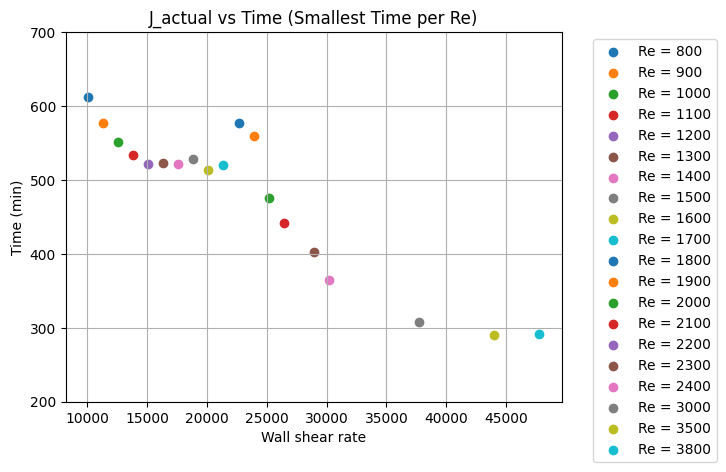

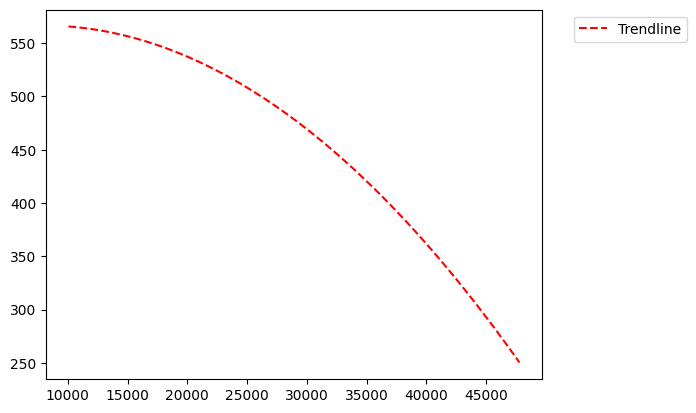

In [131]:
import re
import numpy as np
import matplotlib.pyplot as plt


# Filter the grouped data to select the data with the highest J_actual value for each Re value
filtered_data = {}
for Re_value, data in grouped_data.items():
    # Find the entry with the highest J_actual value
    highest_J_actual_entry = max(data, key=lambda x: x[1])  # x[1] is the J_actual value
    filtered_data[Re_value] = highest_J_actual_entry

# Plot the filtered data
for Re_value, (time, J_actual_value, _) in filtered_data.items():
    time_in_minutes = time / 60  # Convert time to minutes
    
    gamma_w = (((Re_value*0.0013/(1000*1.27e-3))*8)/1.27e-3)*1.95
    plt.scatter(gamma_w, time_in_minutes, label=f'Re = {Re_value}')
 
# Add labels and title
plt.ylabel('Time (min)')
plt.xlabel('Wall shear rate')
plt.ylim(200, 700)
plt.title('J_actual vs Time (Smallest Time per Re)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
# Extract gamma_w and time_in_minutes values for trendline
gamma_w_values = [(((Re_value*0.0013/(1000*1.27e-3))*8)/1.27e-3)*1.95 for Re_value in filtered_data.keys()]
time_values = [time / 60 for time, _, _ in filtered_data.values()]

# Fit a polynomial trendline (degree 2 for a curve)
coefficients = np.polyfit(gamma_w_values, time_values, 2)
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline
gamma_w_trendline = np.linspace(min(gamma_w_values), max(gamma_w_values), 100)
time_trendline = polynomial(gamma_w_trendline)

# Plot the trendline
plt.plot(gamma_w_trendline, time_trendline, color='red', linestyle='--', label='Trendline')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [132]:

# Define the folder path

# Create a dictionary to store the dataframes
dataframes = {}

# Define the different Re values
re_values = [800, 900, 1000, 1100,  1200,  1300, 1400, 1500, 1600,1700]


# Loop through each Re value and read the CSV files
for re_value in re_values:  # Avoid using 're' as a variable name
    folder_path = f"/Users/baochikhuc/Documents/microfiltration_model_2024/Model/Data Global Model Re = {re_value} Perm Loop"
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv') and f.startswith('dynamic_simulation')]
    
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df_name = os.path.splitext(file)[0]  # Use the file name without extension as the key
        dataframes[df_name] = pd.read_csv(file_path)
print(dataframes.keys())
# Display the keys of the dataframes dictionary to see the imported dataframes


dict_keys(['dynamic_simulation_J_actual_12.82_Re800_X1.0', 'dynamic_simulation_J_actual_7.57_Re800_X1.0', 'dynamic_simulation_J_actual_10.19_Re800_X1.0', 'dynamic_simulation_J_actual_2.31_Re800_X1.0', 'dynamic_simulation_J_actual_13.13_Re800_X1.0', 'dynamic_simulation_J_actual_6.25_Re800_X1.0', 'dynamic_simulation_J_actual_8.88_Re800_X1.0', 'dynamic_simulation_J_actual_1.00_Re800_X1.0', 'dynamic_simulation_J_actual_4.94_Re800_X1.0', 'dynamic_simulation_J_actual_11.50_Re800_X1.0', 'dynamic_simulation_J_actual_3.63_Re800_X1.0', 'dynamic_simulation_J_actual_1.00_Re900_X1.0', 'dynamic_simulation_J_actual_6.91_Re900_X1.0', 'dynamic_simulation_J_actual_8.38_Re900_X1.0', 'dynamic_simulation_J_actual_3.95_Re900_X1.0', 'dynamic_simulation_J_actual_14.29_Re900_X1.0', 'dynamic_simulation_J_actual_11.33_Re900_X1.0', 'dynamic_simulation_J_actual_9.85_Re900_X1.0', 'dynamic_simulation_J_actual_9.86_Re900_X1.0', 'dynamic_simulation_J_actual_12.81_Re900_X1.0', 'dynamic_simulation_J_actual_5.43_Re900_X1

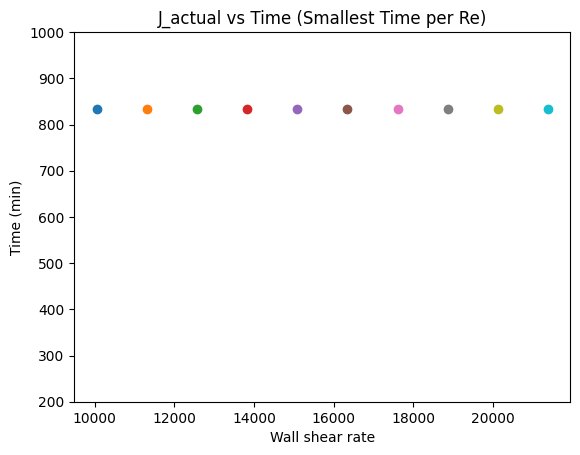

In [133]:
grouped_data = {}
for df_name, df in dataframes.items():
    match = re.search(r"Re(\d+)", str(df_name))
    if match:
        Re_value = int(match.group(1))
        if Re_value not in grouped_data:
            grouped_data[Re_value] = []
        J_actual_match = re.search(r"J_actual_(\d+\.\d+)", df_name)
        if J_actual_match:
            J_actual_value = float(J_actual_match.group(1))
            last_row = df.iloc[-1]
            grouped_data[Re_value].append((last_row['Time (s)'], J_actual_value, Re_value))

# Filter the grouped data to select the data with the smallest time for each Re value
filtered_data = {}
for Re_value, data in grouped_data.items():
    # Find the entry with the smallest time duration
    smallest_time_entry = min(data, key=lambda x: x[0])  # x[0] is the time value
    filtered_data[Re_value] = smallest_time_entry

# Plot the filtered data
for Re_value, (time, J_actual_value, _) in filtered_data.items():
    time_in_minutes = time / 60  # Convert time to minutes
    
    gamma_w = (((Re_value*0.0013/(1000*1.27e-3))*8)/1.27e-3)*1.95
    plt.scatter(gamma_w, time_in_minutes, label=f'Re = {Re_value}')
 
# Add labels and title
plt.ylabel('Time (min)')
plt.xlabel('Wall shear rate')
plt.ylim(200, 1000)
plt.title('J_actual vs Time (Smallest Time per Re)')

plt.show()
